# Yelp Data Analysis

## Introduction

**Yelp** is an online platform that allows users to search for and browse information about businesses, including their address,phone number, hours of operation, and other details. It also enables users to view reviews and ratings of businesses written by other users, and to write and publish their own reviews and comments. Yelp's review system leverages the power of social networking, encouraging users to share their experiences and opinions about businesses, which helps other users to find better businesses. Yelp was founded in 2004 in the United States and has expanded to other countries including Canada, the United Kingdom, Australia, France, Germany, Italy, and Switzerland, among others.


**The Yelp dataset** is a collection of data related to businesses, reviews, users, and other interactions on the Yelp platform. The dataset includes information from several cities across the United States, covering a variety of business categories and user demographics.
The purpose of this dataset is to enable researchers, data analysts, and data scientists to explore and analyze the dynamics of the Yelp platform and gain insights into user behavior, business performance, and market trends. With the increasing popularity of online review platforms like Yelp, this dataset provides a valuable resource for understanding the factors that influence customer satisfaction, business success, and platform growth.

To get started, let's import our libraries.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import gc  
import time  
import warnings  

import matplotlib.pyplot as plt  
import seaborn as sns  
import matplotlib.gridspec as gridspec  
import plotly.offline as pyo  
from plotly.graph_objs import *  
import plotly.graph_objs as go  
import imageio
# !pip install folium
import folium  
import folium.plugins as plugins  
 

In [3]:

import mpl_toolkits.basemap 

import networkx as nx  
import heapq  
 
color = sns.color_palette() 
sns.set_style("darkgrid")  
warnings.filterwarnings("ignore")  
pyo.init_notebook_mode() 

## Database

### `yelp_tip.csv` 

是一个包含了Yelp用户在商家页面上发布的小费（Tip）信息的数据集，通常包含以下字段：

1. `user_id`: 提交小费的用户ID
2. `business_id`: 接收小费的商家ID
3. `text`: 小费的文本内容
4. `date`: 小费提交的日期和时间
5. `compliment_count`: 小费收到的赞数
6. `type`: 数据条目的类型，通常为"tip"表示小费
7. `cool`: 用户对该小费投票的"酷"指数
8. `funny`: 用户对该小费投票的"有趣"指数
9. `useful`: 用户对该小费投票的"有用"指数

这些字段提供了关于Yelp用户在商家页面上发布的小费信息，包括用户ID、商家ID、小费文本内容、提交日期、小费的赞数以及用户投票的指数等。这些数据可以用于探索用户在Yelp上的行为和互动，了解用户对商家的评价和反馈，从而帮助商家和Yelp平台进行改进和优化。

###  `yelp_business.csv` 

是一个包含了Yelp商家信息的数据集，包含以下字段：

1. `business_id`: 商家的唯一标识符
2. `name`: 商家的名称
3. `address`: 商家的地址
4. `city`: 商家所在城市
5. `state`: 商家所在州/省份
6. `postal_code`: 商家的邮政编码
7. `latitude`: 商家所在位置的纬度
8. `longitude`: 商家所在位置的经度
9. `stars`: 商家的评级（1到5之间的整数）
10. `review_count`: 商家的评论数量
11. `is_open`: 商家是否营业中（0表示关闭，1表示营业）
12. `categories`: 商家的类别，通常以逗号分隔
13. `attributes`: 商家的其他属性信息，通常以键值对的形式表示
14. `hours`: 商家的营业时间信息，通常以键值对的形式表示

这些字段提供了关于Yelp商家的基本信息，包括商家的名称、地址、位置信息、评级、评论数量、营业状态、类别、属性和营业时间等。这些数据可以用于分析商家在Yelp上的表现、探索商家之间的差异和相似性、进行地理位置分析等，从而帮助用户了解Yelp上的商家生态和消费者行为。

### `yelp_business_hours.csv` 

是一个包含了Yelp商家营业时间信息的数据集，包含以下字段：

1. `business_id`: 商家的唯一标识符，与 `yelp_business.csv` 中的 `business_id` 字段相对应
2. `monday`: 商家周一的营业时间
3. `tuesday`: 商家周二的营业时间
4. `wednesday`: 商家周三的营业时间
5. `thursday`: 商家周四的营业时间
6. `friday`: 商家周五的营业时间
7. `saturday`: 商家周六的营业时间
8. `sunday`: 商家周日的营业时间

营业时间通常以小时为单位表示，例如 "9:00-17:00" 表示从上午9点到下午5点的营业时间段。商家未填写营业时间的字段通常为空值。

这些字段提供了关于Yelp商家每天的营业时间信息，可以用于分析商家的营业情况、比较不同商家的营业时间差异、进行时间段内的消费者活动分析等。这些数据可以与 `yelp_business.csv` 数据集中的其他商家信息结合使用，从而更全面地了解商家的运营情况。

### `yelp_checkin.csv` 

是一个包含了Yelp用户注册信息的数据集，包含以下字段：

1. `business_id`: 商家的唯一标识符，与 `yelp_business.csv` 中的 `business_id` 字段相对应
2. `date`: 用户注册日期，格式为 "YYYY-MM-DD"
3. `time`: 用户注册时间，格式为 "HH:MM:SS"

该数据集记录了Yelp用户在商家处注册的日期和时间信息。这些数据可以用于分析用户注册活跃度、注册时间分布、不同商家的用户注册情况等，从而帮助商家更好地了解用户行为和优化运营策略。

这些数据可以与 `yelp_business.csv` 数据集中的其他商家信息结合使用，从而更全面地了解商家的用户注册情况，并帮助商家做出更具数据支持的经营决策。

### `yelp_user.csv` 

是一个包含了Yelp用户信息的数据集，包含以下字段：

1. `user_id`: 用户的唯一标识符
2. `name`: 用户的昵称或用户名
3. `review_count`: 用户发布的评论数量
4. `yelping_since`: 用户加入Yelp的日期，格式为 "YYYY-MM-DD"
5. `friends`: 用户的好友列表，用逗号分隔的用户ID列表
6. `useful`: 用户被其他用户评为“有用”的次数
7. `funny`: 用户被其他用户评为“搞笑”的次数
8. `cool`: 用户被其他用户评为“酷”的次数
9. `fans`: 关注该用户的粉丝数量
10. `elite`: 用户的精英会员状态，表示用户是否曾经是Yelp的精英会员，并列出了具体的年份
11. `average_stars`: 用户的平均评分
12. `compliment_hot`: 用户收到的“热门”的称赞次数
13. `compliment_more`: 用户收到的“更多”的称赞次数
14. `compliment_profile`: 用户收到的“个人资料”的称赞次数
15. `compliment_cute`: 用户收到的“可爱”的称赞次数
16. `compliment_list`: 用户收到的“列表”的称赞次数
17. `compliment_note`: 用户收到的“留言”的称赞次数
18. `compliment_plain`: 用户收到的“普通”的称赞次数
19. `compliment_cool`: 用户收到的“酷”的称赞次数
20. `compliment_funny`: 用户收到的“搞笑”的称赞次数
21. `compliment_writer`: 用户收到的“写作”的称赞次数
22. `compliment_photos`: 用户收到的“照片”的称赞次数


In [4]:
start_time = time.time()

# 导入yelp_business.csv数据集
business = pd.read_csv("yelp_business.csv")  # 使用pd.read_csv()函数从CSV文件中读取数据
#business_attributes=pd.read_csv("../data/yelp_business_attributes.csv")  # 可以添加其他的数据集导入语句，例如yelp_business_attributes.csv

# 导入yelp_business_hours.csv数据集
business_hours = pd.read_csv("yelp_business_hours.csv")  

# 导入yelp_checkin.csv数据集
check_in = pd.read_csv("yelp_checkin.csv")  

# 导入yelp_review.csv数据集
reviews = pd.read_csv("yelp_review.csv")  

# 导入yelp_tip.csv数据集
tip = pd.read_csv("yelp_tip.csv")  

# 导入yelp_user.csv数据集
user = pd.read_csv("yelp_user.csv")  

# 计算导入数据集所花费的时间
end_time = time.time() # 获取当前时间
print("Took", end_time - start_time, "s") # 输出导入数据集所花费的时间


Took 49.31977105140686 s


In [5]:
business.head()

business_id                        name neighborhood  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"          NaN   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"          NaN   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"          NaN   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"          NaN   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"          NaN   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars  review_count  is_open  \
0  33.330690 -111.978599    4.0            22        1   
1  40.291685  -80.104900    3.0            11        1   
2  33.524903 -112.115310    1.5            18        1   
3  33.383147 -111.964725    3.0             9        0   
4  41.119535  -81.475690    3.5           116        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

### 评分分布

以下代码通过使用seaborn库的barplot()函数绘制了一个条形图，展示了不同星级评分的商家数量分布情况

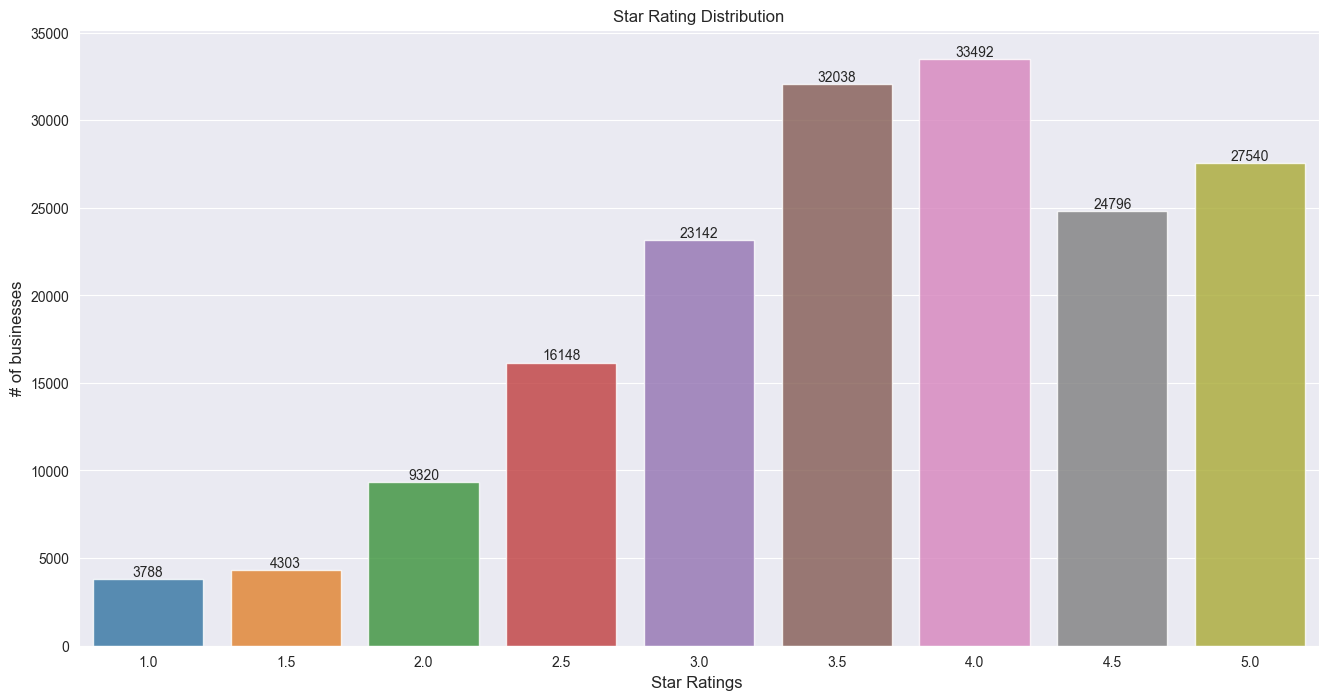

In [6]:
# 获取星级评分的分布
x = business['stars'].value_counts()  # 使用value_counts()函数获取星级评分的计数
x = x.sort_index()  # 对计数结果按照索引（星级评分）排序

# 绘制条形图
plt.figure(figsize=(16,8))  # 设置图像大小
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)  # 使用seaborn库的barplot函数绘制条形图
plt.title("Star Rating Distribution")  # 设置图标题
plt.ylabel('# of businesses', fontsize=12)  # 设置y轴标签
plt.xlabel('Star Ratings ', fontsize=12)  # 设置x轴标签

# 添加标签文本
rects = ax.patches  # 获取条形图的矩形对象
labels = x.values  # 获取计数值
for rect, label in zip(rects, labels):  # 遍历矩形对象和计数值
    height = rect.get_height()  # 获取矩形的高度
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')  # 在矩形上方添加文本标签

plt.show()  # 显示图像

以下代码通过使用seaborn库的barplot()函数绘制了一个条形图，展示了 Yelp 上热门的业务类别及其数量分布情况。

Yelp上共有 59106 种不同的业务类型/类别!


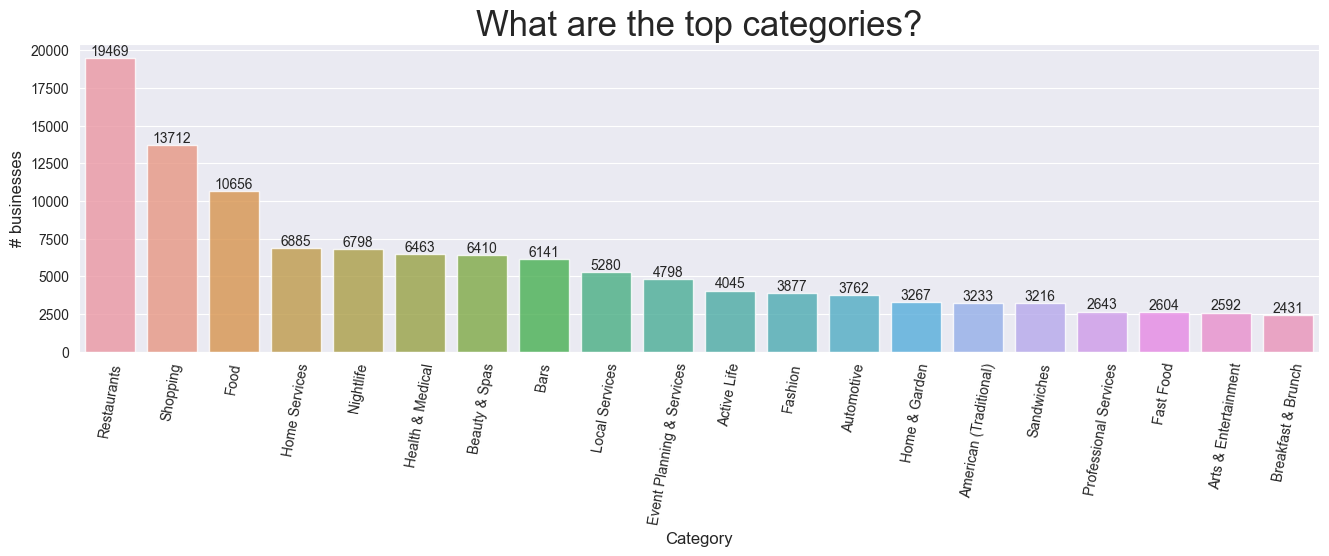

In [7]:
# 获取所有商家的业务类别
business_cats = ' '.join(business['categories'])  # 将所有商家的业务类别连接成一个字符串

# 将业务类别拆分为单独的类别，并存储在DataFrame中
cats = pd.DataFrame(business_cats.split(';'), columns=['category'])  # 使用分号将业务类别拆分为单独的类别，并创建DataFrame
x = cats.category.value_counts()  # 使用value_counts()函数获取每个类别的计数
print("Yelp上共有", len(x), "种不同的业务类型/类别!")  # 输出不同业务类别的数量

# 准备绘制条形图的数据
x = x.sort_values(ascending=False)  # 按照计数值降序排序
x = x.iloc[0:20]  # 只取前20个类别用于绘制图表

# 绘制条形图
plt.figure(figsize=(16,4))  # 设置图像大小
ax = sns.barplot(x = x.index, y = x.values, alpha=0.8)  # 使用seaborn库的barplot函数绘制条形图
plt.title("What are the top categories?", fontsize=25)  # 设置图标题
locs, labels = plt.xticks()  # 获取x轴刻度位置和标签
plt.setp(labels, rotation=80)  # 设置x轴标签旋转角度
plt.ylabel('# businesses', fontsize=12)  # 设置y轴标签
plt.xlabel('Category', fontsize=12)  # 设置x轴标签

# 添加标签文本
rects = ax.patches  # 获取条形图的矩形对象
labels = x.values  # 获取计数值
for rect, label in zip(rects, labels):  # 遍历矩形对象和计数值
    height = rect.get_height()  # 获取矩形的高度
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')  # 在矩形上方添加文本标签

plt.show()  # 显示图像


## 地图部分

### 评论来源地点分析

在地图部分，我们分析各个`商家`的`地理位置`。

1. 首先，我们查看Yelp商家的`全球视图`
2. 然后，我们放大到两个`最集中的地区`（北美地区、欧洲地区）
3. 探索`评论最多的城市`
4. 可视化排名`前两位`的城市

### 全球视图


注释：在这段代码中，我们使用了Matplotlib和Basemap库来创建一个基础的世界地图。首先，我们导入了需要的库。然后，我们创建了一个指定大小的图像窗口。接着，我们使用正投影（ortho projection）来生成地球型版本的地图。我们通过指定的颜色代码来填充大陆和海洋的颜色。然后，我们绘制了国家的边界线，并使用散点图的方式在地图上标示出商家的经纬度位置。最后，我们为地图添加了一个标题并显示出来。

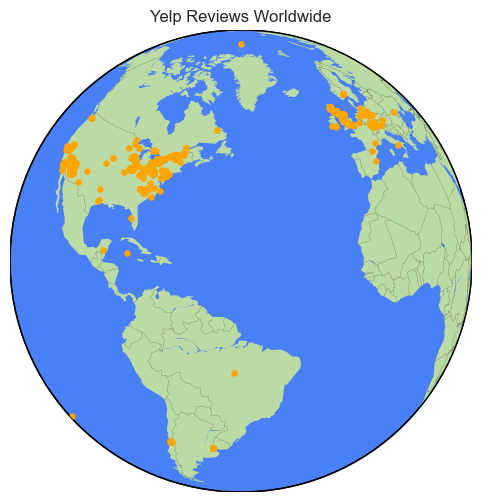

In [8]:
# 导入必要的库
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 创建一个指定大小的图像窗口
plt.figure(1, figsize=(15,6))

# 使用正投影（ortho projection）生成地球型版本的地图
m1 = Basemap(projection='ortho', lat_0=20, lon_0=-50)

# 使用指定的颜色代码填充大陆和海洋的颜色
m1.fillcontinents(color='#bbdaa4', lake_color='#4a80f5') 

# 添加指定颜色的海洋边界
m1.drawmapboundary(fill_color='#4a80f5')                

# 绘制国家边界线，并设置线宽和颜色
m1.drawcountries(linewidth=0.1, color="black")

# 使用散点图在地图上标示商家的经纬度位置
mxy = m1(business["longitude"].tolist(), business["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="orange", lw=3, alpha=1, zorder=5)

# 为地图添加标题
plt.title("Yelp Reviews Worldwide")

# 显示地图
plt.show()

### 北美洲和欧洲地区

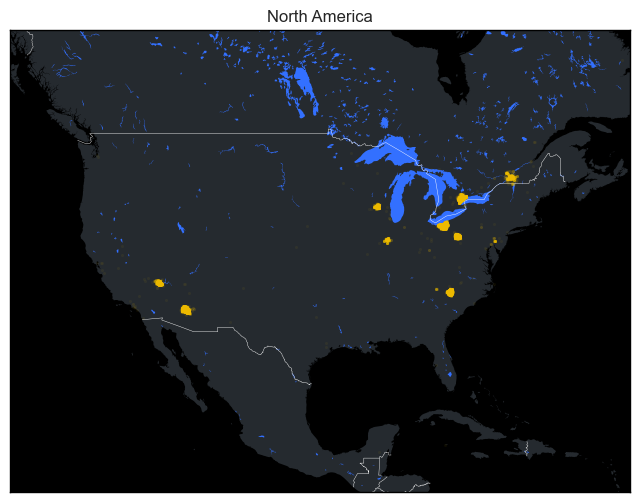

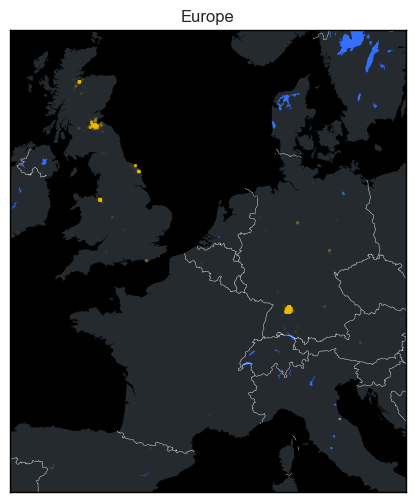

In [9]:
# 将数据筛选为北美地区
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715, 56.395664

# 创建选择器
idx_NA = (business["longitude"] > lon_min) & \
         (business["longitude"] < lon_max) & \
         (business["latitude"] > lat_min) & \
         (business["latitude"] < lat_max)
# 应用选择器进行子集筛选
NA_business = business[idx_NA]

# 初始化绘图
plt.figure(figsize=(12, 6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#252a2f', lake_color='#3370ff')  # 深灰色陆地，蓝色湖泊
m2.drawmapboundary(fill_color='#000000')  # 黑色背景
m2.drawcountries(linewidth=0.3, color="w")  # 白色线条标示国界

# 绘制数据
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#ffcc00", lw=0, alpha=0.05, zorder=5)

plt.title("North America")

# 将数据筛选为欧洲地区
lon_min, lon_max = -8.613281, 16.699219
lat_min, lat_max = 40.488737, 59.204064

# 创建选择器
idx_euro = (business["longitude"] > lon_min) & \
           (business["longitude"] < lon_max) & \
           (business["latitude"] > lat_min) & \
           (business["latitude"] < lat_max)
# 应用选择器进行子集筛选
euro_business = business[idx_euro]

# 初始化绘图
plt.figure(figsize=(12, 6))
m3 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m3.fillcontinents(color='#252a2f', lake_color='#3370ff')  # 深灰色陆地，蓝色湖泊
m3.drawmapboundary(fill_color='#000000')  # 黑色背景
m3.drawcountries(linewidth=0.3, color="w")  # 白色线条标示国界

# 绘制数据
mxy = m3(euro_business["longitude"].tolist(), euro_business["latitude"].tolist())
m3.scatter(mxy[0], mxy[1], s=5, c="#ffcc00", lw=0, alpha=0.05, zorder=5)

plt.title("Europe")
plt.show()


### 城市视角（拉斯维加斯，菲尼克斯，斯图加特，爱丁堡）

然后，我们通过绘制 4 个城市（Las Vegas、Pheonix、Stuttgart、Edinburgh）的经纬度图来了解它们的外观。

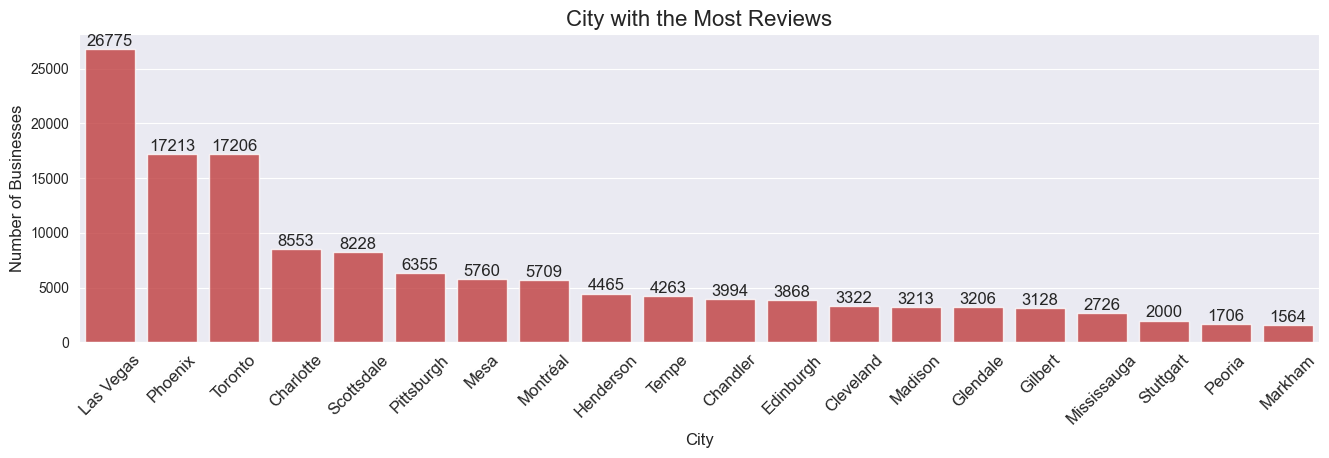

In [10]:
# 获取城市的评级数量
x = business['city'].value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]

# 绘制柱状图
plt.figure(figsize=(16,4))
ax = sns.barplot(x = x.index, y = x.values, alpha=0.8, color=color[3]) # 设置颜色为color[3]
plt.title("City with the Most Reviews", fontsize=16) # 设置标题和字体大小
plt.xticks(rotation=45, fontsize=12) # 设置X轴标签的旋转角度和字体大小
plt.ylabel('Number of Businesses', fontsize=12) # 设置Y轴标签和字体大小
plt.xlabel('City', fontsize=12) # 设置X轴标签和字体大小

rects = ax.patches # 获取柱状图的每个矩形对象
labels = x.values # 获取柱状图上方的数字标签

# 在每个柱状图上方添加数字标签
for rect, label in zip(rects, labels):
    height = rect.get_height() # 获取柱状图的高度
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=12) # 添加数字标签，设置位置、对齐方式和字体大小

plt.show() # 显示柱状图

In [11]:
# 获取所有的评分数据
rating_data = business[['latitude', 'longitude', 'stars', 'review_count']]
# 创建一个自定义列 'popularity'，计算方法为评分乘以评论数量
rating_data['popularity'] = rating_data['stars'] * rating_data['review_count']

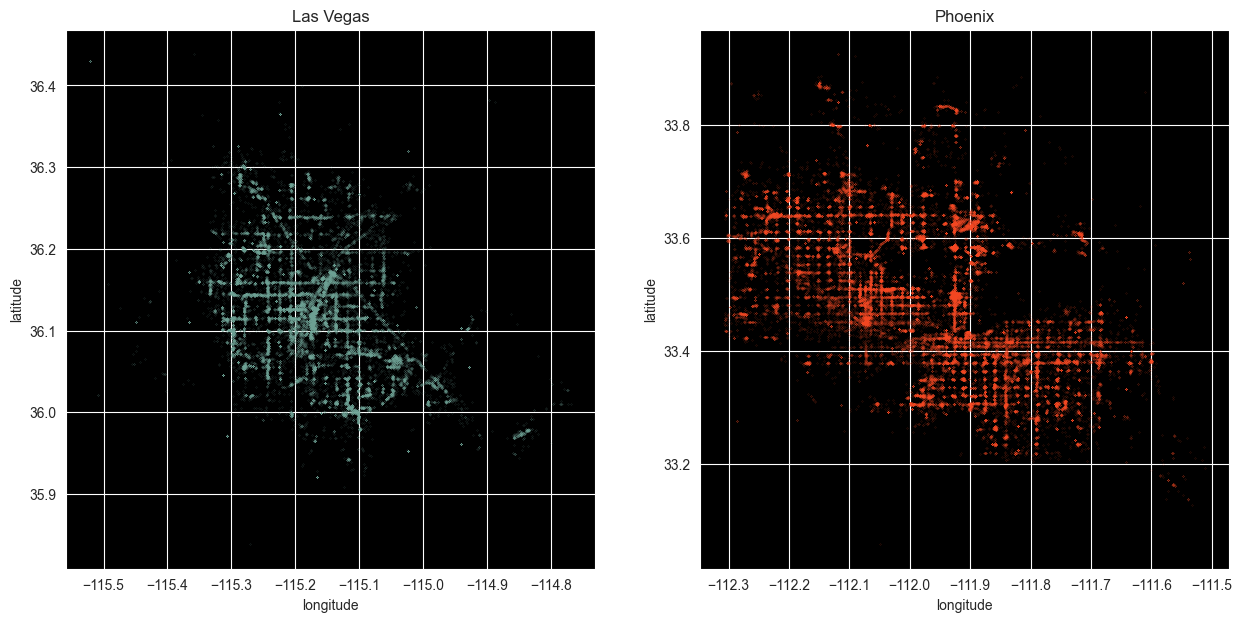

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # 创建一个包含两个子图的画布，设置画布大小为15x7

# 拉斯维加斯的随机点坐标
lat = 36.207430
lon = -115.268460
# 进行坐标调整，获取合适的图像
lon_min, lon_max = lon - 0.3, lon + 0.5
lat_min, lat_max = lat - 0.4, lat + 0.5
# 根据经纬度范围筛选出拉斯维加斯的数据
ratings_data_vegas = rating_data[(rating_data["longitude"] > lon_min) &
                                (rating_data["longitude"] < lon_max) &
                                (rating_data["latitude"] > lat_min) &
                                (rating_data["latitude"] < lat_max)]

# 绘制拉斯维加斯的散点图
ratings_data_vegas.plot(kind='scatter', x='longitude', y='latitude',
                       color='#74a89b',
                       s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Las Vegas")  # 设置子图1的标题
ax1.set_facecolor('black')  # 设置子图1的背景颜色为黑色

# 凤凰城的随机点坐标
lat = 33.435463
lon = -112.006989
# 进行坐标调整，获取合适的图像
lon_min, lon_max = lon - 0.3, lon + 0.5
lat_min, lat_max = lat - 0.4, lat + 0.5
# 根据经纬度范围筛选出凤凰城的数据
ratings_data_phoenix = rating_data[(rating_data["longitude"] > lon_min) &
                                  (rating_data["longitude"] < lon_max) &
                                  (rating_data["latitude"] > lat_min) &
                                  (rating_data["latitude"] < lat_max)]
# 绘制凤凰城的散点图
ratings_data_phoenix.plot(kind='scatter', x='longitude', y='latitude',
                         color='#fb4e29',
                         s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Phoenix")  # 设置子图2的标题
ax2.set_facecolor('black')  # 设置子图2的背景颜色为黑色

f.show()  # 显示画布

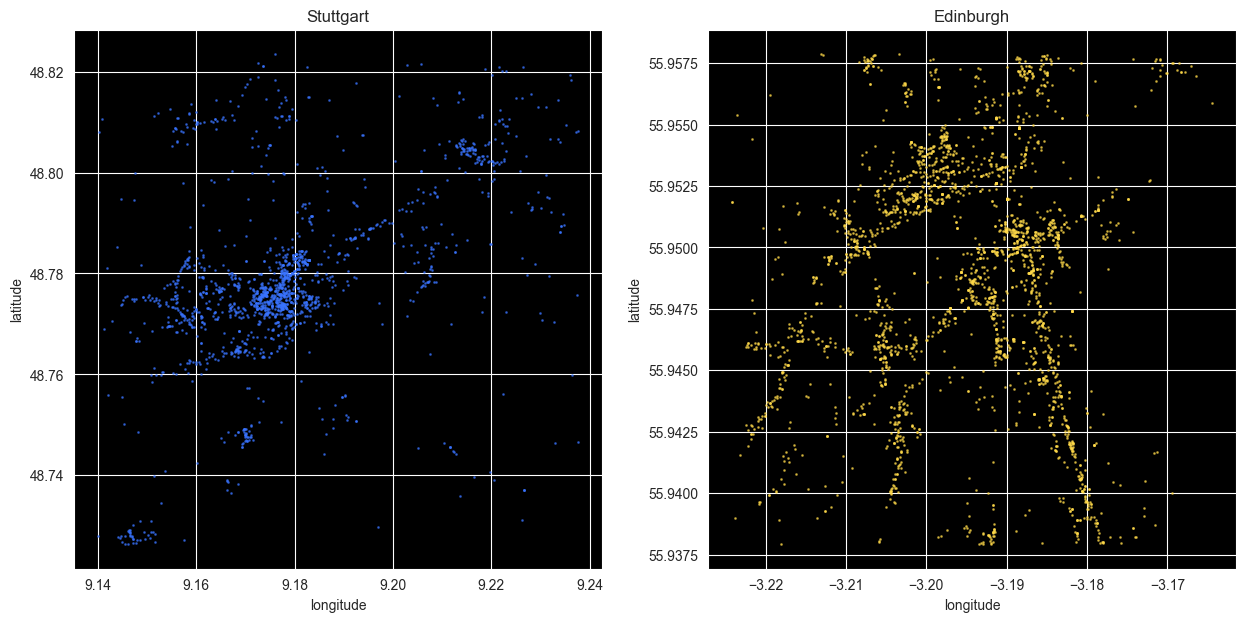

In [13]:
# 导入必要的绘图库
import matplotlib.pyplot as plt

# 创建包含两个子图的图形窗口，大小为15x7
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

# 在斯图加特市内随机选择一个点
lat = 48.7757200
lon = 9.187950
# 对经纬度进行微调，以获取合适的图片
lon_min, lon_max = lon-0.05,lon+0.05
lat_min, lat_max = lat-0.05,lat+0.05
# 在斯图加特市内筛选数据
ratings_data_stuttgart=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]

# 绘制斯图加特市的散点图
ratings_data_stuttgart.plot(kind='scatter', x='longitude', y='latitude',
                color='#3973fe', 
                s=1, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Stuttgart") # 设置子图标题
ax1.set_facecolor('black') # 设置子图背景色为黑色

# 在爱丁堡市内随机选择一个点
lat = 55.947871
lon = -3.194255
# 对经纬度进行微调，以获取合适的图片
lon_min, lon_max = lon-0.03,lon+0.03
lat_min, lat_max = lat-0.01,lat+0.01
# 在爱丁堡市内筛选数据
ratings_data_edinburgh=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]
                    
# 绘制爱丁堡市的散点图
ratings_data_edinburgh.plot(kind='scatter', x='longitude', y='latitude',
                color='#ffd949', 
                s=1, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Edinburgh") # 设置子图标题
ax2.set_facecolor('black') # 设置子图背景色为黑色

# 显示图形窗口
f.show()

有趣的观察是，美国城市通常有着规整的街区或网格结构，而其他城市则可能呈现出更为流动和不规则的设计。通过将企业的位置信息在地图上可视化，我们可以更深入地了解不同城市区域的经济活动分布和企业聚集情况。这种方式能够以直观和吸引人的方式揭示城市区域内的空间模式和趋势，对于城市规划、政策制定和企业决策等方面都非常有价值。通过数据可视化，我们可以通过视觉方式深入探讨和理解城市区域内的复杂空间关系，从而更好地了解城市的发展和变化。

### 拉斯维加斯的评级 

让我们来看看人们如何评价`维加斯的不同企业`。

以下是一个`交互式动画`，我们在其中使用了不起的 Folium 包来创建令人惊叹的 Leaflet 地图视觉效果。

在这里，在此动画中，我们根据星级评分显示突出显示的业务。

目的是查看是否有某些热点/集中地有很棒的餐厅。

事实证明，**好商户和坏商户相当均匀地散布在城市各处。**

`folium` 是一个用于在 Python 中创建交互式地图的库，它基于 Leaflet JavaScript 库。`folium` 提供了简单的接口，可以在地图上添加标记、热力图、多边形、圆形等各种地图元素，并支持在地图上显示数据、添加弹出窗口等功能。

以下是使用 `folium` 创建一个简单地图的示例代码：

```python
import folium

# 创建地图对象
m = folium.Map(location=[36.127430, -115.138460], zoom_start=11) # 指定初始中心坐标和缩放级别

# 在地图上添加标记
folium.Marker(location=[36.127430, -115.138460], popup='Las Vegas').add_to(m) # 添加标记，并设置弹出窗口内容

# 显示地图
m
```

In [14]:
data=[]
# 重新排列数据以适应folium所需的格式
stars_list=list(rating_data['stars'].unique()) # 获取唯一的评分值列表
for star in stars_list: # 遍历评分值列表
    subset=ratings_data_vegas[ratings_data_vegas['stars']==star] # 根据评分值筛选数据子集
    data.append(subset[['latitude','longitude']].values.tolist()) # 将经纬度数据转换为列表并添加到data列表中
# 初始化地图的中心坐标和缩放级别
lat = 36.127430
lon = -115.138460
zoom_start=11
print("Vegas Review heatmap Animation ") # 打印标题

# 创建一个基本的folium地图
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=zoom_start)
# 使用HeatMapWithTime插件来创建带有时间动态变化的热力图
hm = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=True,display_index=True,radius=7)
hm.add_to(m) # 将热力图添加到地图中
m # 显示地图


Vegas Review heatmap Animation 


In [15]:
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 58.38773798942566 s


## 评论挖掘

让我们根据他们给出的评论数量来查看排名靠前的用户。

In [16]:
# 数据量太大，有100多万个用户，所以抽样100000条数据，你可以用全量数据
user_agg=reviews.sample(100000).groupby('user_id').agg(
            {'review_id':['count'],
             'date':['min','max'],
             'useful':['sum'],
             'funny':['sum'],
             'cool':['sum'],
             'stars':['mean']})

这段代码使用了 Pandas 库对名为 reviews 的数据框按照 'user_id' 列进行分组聚合，并计算了多个聚合函数的结果。

具体而言，使用了 `groupby` 方法将数据框 `reviews` 按照 'user_id' 列进行分组。然后，使用 `agg` 方法对每个分组应用了多个聚合函数，包括 'count'、'min'、'max'、'sum'、'mean' 等，计算了以下指标：

- 'review_id': 'count'，计算每个用户的评论数量；
- 'date': 'min' 和 'max'，分别计算每个用户的评论日期的最小值和最大值；
- 'useful': 'sum'，计算每个用户的评论中 'useful' 列的总和；
- 'funny': 'sum'，计算每个用户的评论中 'funny' 列的总和；
- 'cool': 'sum'，计算每个用户的评论中 'cool' 列的总和；
- 'stars': 'mean'，计算每个用户的评论中 'stars' 列的平均值。

聚合的结果将保存在名为 `user_agg` 的新数据框中，包含了各个聚合函数计算的结果。这样可以对每个用户的评论数据进行汇总和统计分析，便于进一步的数据分析和可视化。

In [17]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id        date             useful funny cool  \
                           count         min         max    sum   sum  sum   
user_id                                                                      
CxDOIDnH8gp9KXzpBHJYXw        65  2009-11-21  2017-07-03    198    96  133   
DK57YibC5ShBmqQl97CKog        41  2007-01-15  2017-09-03    283   128  210   
bLbSNkLggFnqwNNzzq-Ijw        37  2014-01-10  2017-12-04    468   204  310   
PKEzKWv_FktMm2mGPjwd0Q        30  2010-11-18  2017-05-02    272   108  186   
QJI9OSEn6ujRCtrX06vs1w        29  2007-03-20  2013-11-24    154    70  117   
ELcQDlf69kb-ihJfxZyL0A        26  2011-05-28  2017-11-28     47    29   22   
UYcmGbelzRa0Q6JqzLoguw        23  2010-12-06  2017-10-28    132    65  106   
iDlkZO2iILS8Jwfdy7DP9A        23  2009-11-11  2017-11-23    113    55   68   
hWDybu_KvYLSdEFzGrniTw        22  2009-09-26  2017-10-20    138    87  109   
N3oNEwh0qgPqPP3Em6wJXw        22  2011-01-30  2013-05-19     54    32   34   

                           stars  
                            mean  
user_id                           
CxDOIDnH8gp9KXzpBHJYXw  3.138462  
DK57YibC5ShBmqQl97CKog  3.707317  
bLbSNkLggFnqwNNzzq-Ijw  3.243243  
PKEzKWv_FktMm2mGPjwd0Q  3.666667  
QJI9OSEn6ujRCtrX06vs1w  3.586207  
ELcQDlf69kb-ihJfxZyL0A  3.192308  
UYcmGbelzRa0Q6JqzLoguw  3.434783  
iDlkZO2iILS8Jwfdy7DP9A  3.695652  
hWDybu_KvYLSdEFzGrniTw  3.545455  
N3oNEwh0qgPqPP3Em6wJXw  3.772727

评论可能是从所有评论中随机抽取的数据

### 追踪高价值用户

让我们从评论数据集中跟踪排名靠前的用户

为此，我们创建了一张他按时间顺序查看过的所有地点的地图，然后从中创建了热图动画。

In [18]:
# 追踪顶级用户:
top_user_reviews = reviews[reviews['user_id'] == 'CxDOIDnH8gp9KXzpBHJYXw']
# 获取顶级用户评论的地点信息
top_user_locs = pd.merge(top_user_reviews, business, on='business_id')
# 获取顶级用户评论的唯一日期列表
date_list = list(top_user_locs['date'].unique())
# 重新组织数据以符合 Folium 库所需的格式
data = []
for date in date_list:
    subset = top_user_locs[top_user_locs['date'] == date]
    df = subset[['latitude', 'longitude', 'date']]
    data.append(subset[['latitude', 'longitude']].values.tolist())

In [19]:
# 初始化地图，设置初始位置为加拿大安大略省，经纬度分别为43.860397和-79.303184，初始缩放级别为9
lat = 43.860397
lon = -79.303184
zoom_start = 9
print("                     Stalking the top User    ")
# 创建基础地图对象，使用 Cartodb Positron 瓦片样式，设置初始位置和缩放级别
m = folium.Map(location=[lat, lon], tiles="Cartodb Positron", zoom_start=zoom_start)

# 创建带有时间轴的热力图对象，传入数据和其他参数
hm = plugins.HeatMapWithTime(data, max_opacity=0.3, auto_play=True, display_index=True)
hm.add_to(m) # 将热力图对象添加到地图中
m # 显示地图


                     Stalking the top User    


"Highest Rating with increasing Useful"：

该回归图展示了随着评论中有用标记数量增加，最高评分（stars）的变化趋势。

x轴表示有用标记的阈值（thresholds），从100到1000，间隔为20；

y轴表示对应阈值下的最高评分的值。图表可以帮助我们了解有用标记数量与最高评分之间的关系。

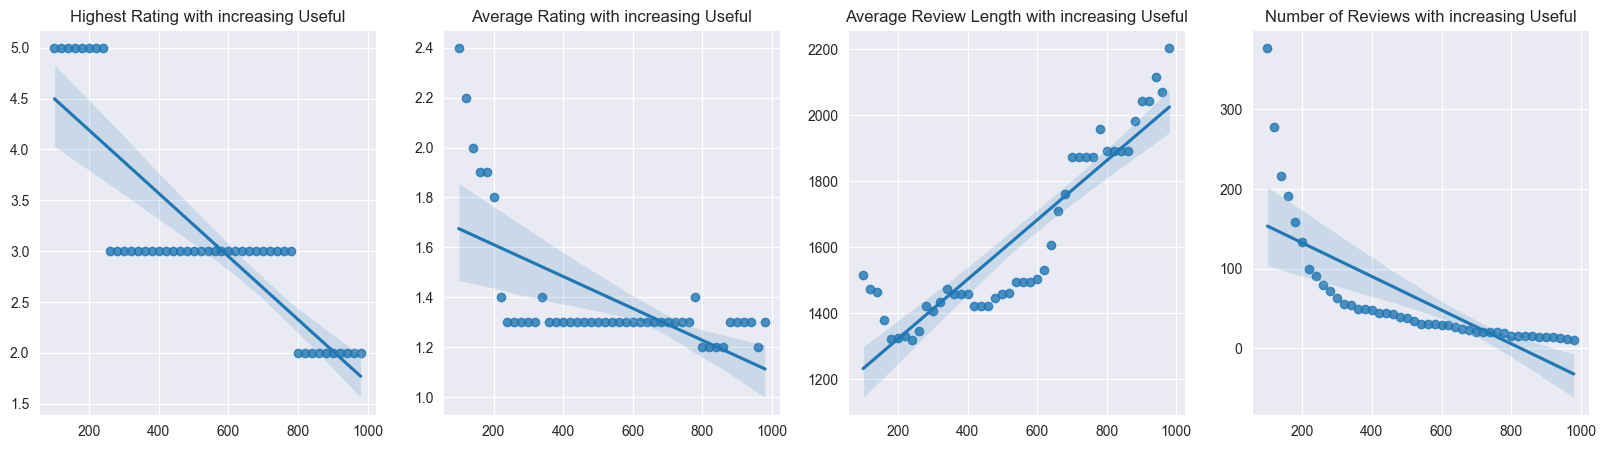

In [20]:
reviews = reviews.query('useful>0 and funny>0 and cool>0')

thresholds = [x for x in range(100,1000,20)]
max_star = [round(reviews.query('useful>@thres').stars.max(),1) for thres in thresholds]
avg_star = [round(reviews.query('useful>@thres').stars.mean(),1) for thres in thresholds]
avg_review_len = [reviews.query('useful>@thres')['text'].agg(lambda x: len(x)).agg('mean') for thres in thresholds]
n_review = [reviews.query('useful>@thres').stars.count() for thres in thresholds]

fig, axes = plt.subplots(1, 4, figsize = [20,5])
sns.regplot(x=thresholds, y=max_star,ax = axes[0])
axes[0].title.set_text('Highest Rating with increasing Useful')

sns.regplot(x=thresholds, y=avg_star,ax = axes[1])
axes[1].title.set_text('Average Rating with increasing Useful')

sns.regplot(x=thresholds, y=avg_review_len,ax = axes[2])
axes[2].title.set_text('Average Review Length with increasing Useful')

sns.regplot(x=thresholds, y=n_review,ax = axes[3])
axes[3].title.set_text('Number of Reviews with increasing Useful')

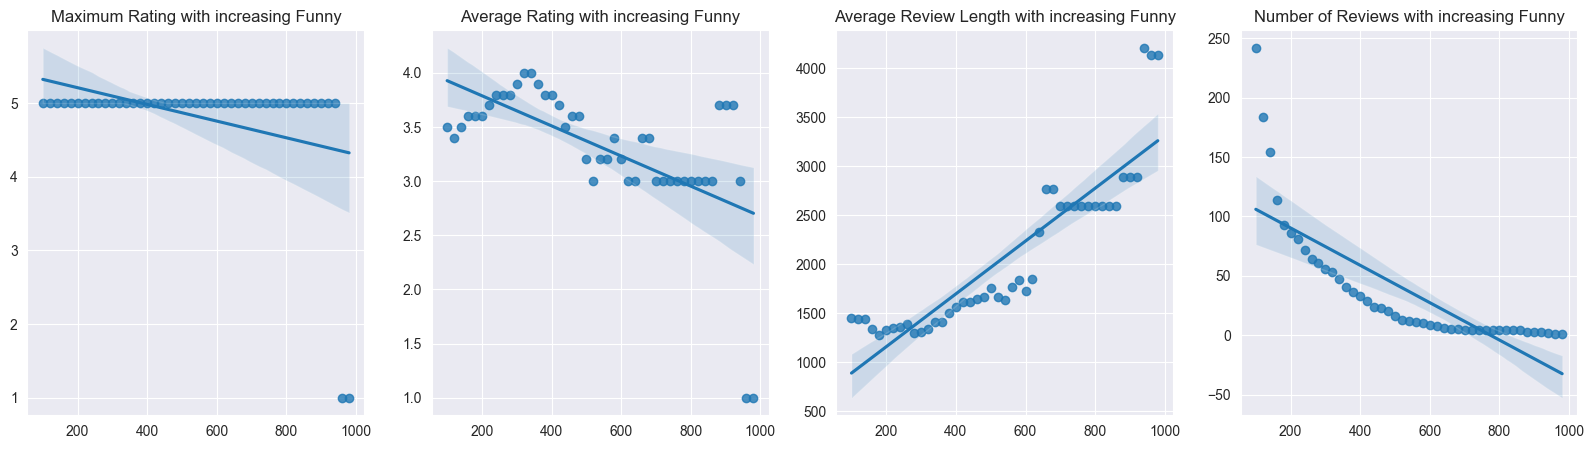

In [21]:
thresholds = [x for x in range(100,1000,20)]
max_star = [round(reviews.query('funny>@thres').stars.max(),1) for thres in thresholds]
avg_star = [round(reviews.query('funny>@thres').stars.mean(),1) for thres in thresholds]
avg_review_len = [reviews.query('funny>@thres')['text'].agg(lambda x: len(x)).agg('mean') for thres in thresholds]
n_review = [reviews.query('funny>@thres').stars.count() for thres in thresholds]

fig, axes = plt.subplots(1, 4, figsize = [20,5])
sns.regplot(x=thresholds, y=max_star,ax = axes[0])
axes[0].title.set_text('Maximum Rating with increasing Funny')

sns.regplot(x=thresholds, y=avg_star,ax = axes[1])
axes[1].title.set_text('Average Rating with increasing Funny')

sns.regplot(x=thresholds, y=avg_review_len,ax = axes[2])
axes[2].title.set_text('Average Review Length with increasing Funny')

sns.regplot(x=thresholds, y=n_review,ax = axes[3])
axes[3].title.set_text('Number of Reviews with increasing Funny')

### 情感分析

In [22]:
# !pip install textblob
from textblob import TextBlob


以下是一个简单的 TextBlob 实现示例，演示了如何使用 TextBlob 进行基本的文本处理和情感分析：

```python
from textblob import TextBlob

# 创建 TextBlob 对象
text = "I love this product! It's amazing."
blob = TextBlob(text)

# 分词
words = blob.words
print("分词结果：", words)

# 词性标注
tags = blob.tags
print("词性标注结果：", tags)

# 名词短语提取
noun_phrases = blob.noun_phrases
print("名词短语提取结果：", noun_phrases)

# 情感分析
sentiment = blob.sentiment
polarity = sentiment.polarity
subjectivity = sentiment.subjectivity
print("情感分析结果：")
print("极性（-1 到 1 之间，负面到正面）：", polarity)
print("主观性（0 到 1 之间，客观到主观）：", subjectivity)
```

这段代码首先导入了 TextBlob 库，并创建了一个 TextBlob 对象 blob，表示待处理的文本。然后，通过调用 TextBlob 对象的方法，如 words、tags、noun_phrases 和 sentiment，进行文本处理和情感分析。

在这个示例中，输入文本是 "I love this product! It's amazing."，TextBlob 对象 blob 分别执行了分词、词性标注、名词短语提取和情感分析这几个任务，并输出了相应的结果。

In [23]:
%%time
elite_review_sentiment_score_2012 = reviews.merge(user[user['elite'] != 'None']['user_id'])\
.query("date.str.startswith('2012')", engine='python')['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

regular_review_sentiment_score_2012 = reviews.merge(user[user['elite'] == 'None']['user_id'])\
.query("date.str.startswith('2012')", engine='python')['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

CPU times: user 1min 6s, sys: 242 ms, total: 1min 6s
Wall time: 1min 7s


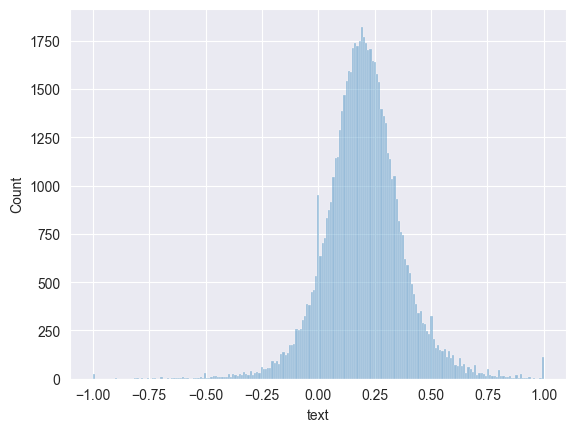

In [24]:
import seaborn as sns

ax1 = sns.histplot(elite_review_sentiment_score_2012, alpha = .4)
ax2 = sns.histplot(regular_review_sentiment_score_2012, alpha = .4)

In [25]:
def senti_word_cloud(s,max_words = 200):
    matplotlib.rcParams['figure.figsize'] = (20,10)
    # color_mask =imageio.imread("1.png")
    wc1 = WordCloud(background_color="black",  # 背景颜色
            max_words=max_words,  # 显示最大词数
            width=1920, height=1080
            ) # 图幅宽度
    
    wc2 = WordCloud(background_color="white",  # 背景颜色
            max_words=max_words,  # 显示最大词数
            width=1920, height=1080
            ) # 图幅宽度
    
    positivelist = []
    negativelist = []

    from textblob import TextBlob
    for each in s:
        each_word = TextBlob(each)
        feeling = each_word.sentiment.polarity
        if feeling > 0.25:
            positivelist.append(each)
        elif feeling < -0.25:
            negativelist.append(each)
        else:
            pass
    # 将积极和消极的两个列表各自合并成积极字符串和消极字符串，字符串中的词用空格分隔
    
    positive_string = " ".join(positivelist)
    negative_string = " ".join(negativelist)

    
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    wc1.generate(negative_string) 
    axes[0].imshow(wc1, interpolation='bilinear')
    axes[0].set_title('Negative')
    axes[0].axis('off')

    wc2.generate(positive_string) 
    axes[1].imshow(wc2, interpolation='bilinear')
    axes[1].set_title('Positive')
    axes[1].axis('off')

    plt.show()

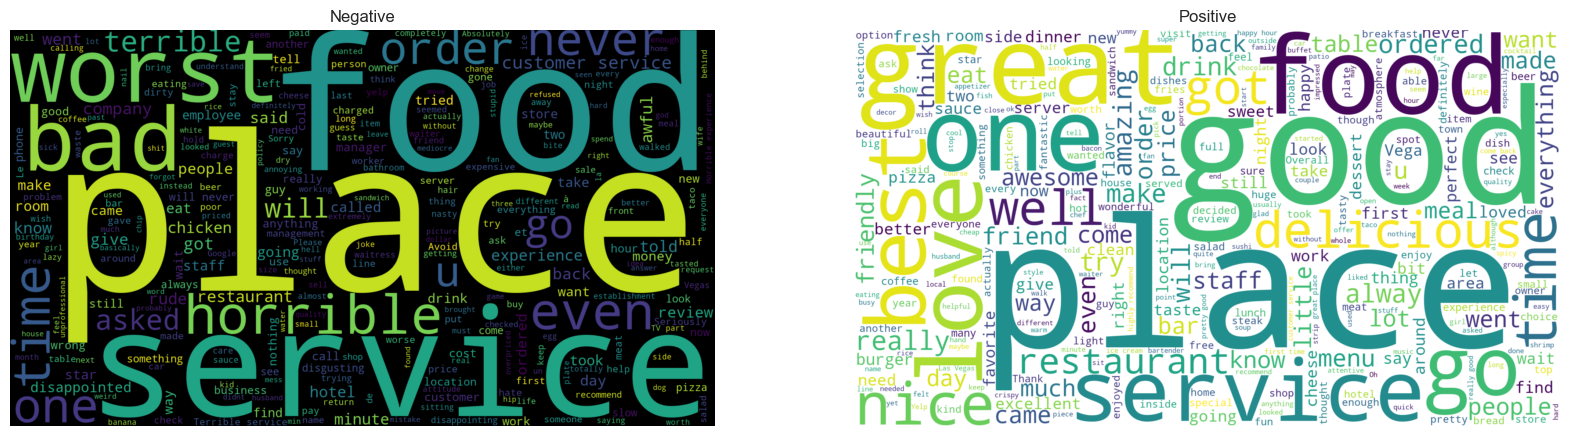

In [26]:
import matplotlib
from wordcloud import WordCloud

senti_word_cloud(reviews['text'].sample(20000),max_words = 300)

分别对精英用户和普通用户的评论进性情感分析的极性打分，可以看出总体极性分布，精英用户更加集中在0.25左右，偏正向

然后我们分别看看极性超过0.25或者小于-0.25的关键词分布情况，构建词云

## 5.3 User summary stats:

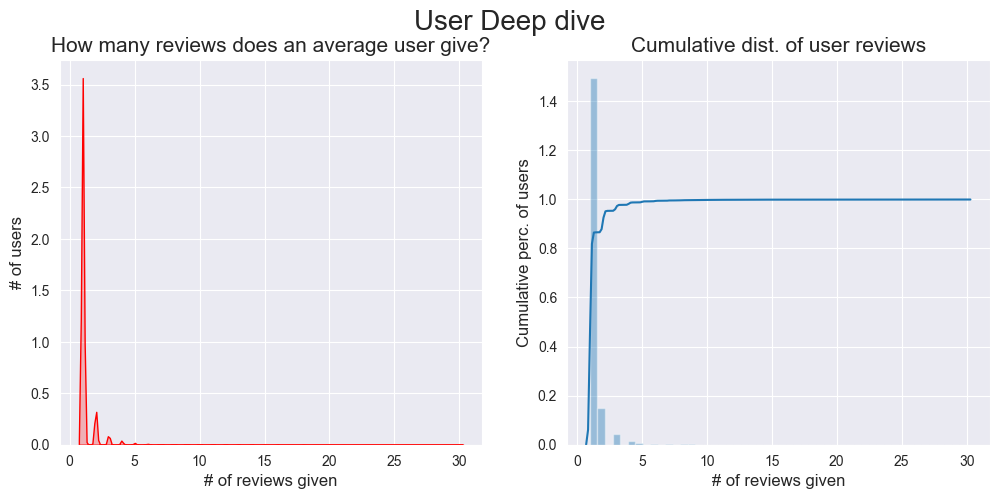

Took 181.60926604270935 s


In [27]:
# Cap max reviews to 30 for better visuals
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
plt.figure(figsize=(12,5))
plt.suptitle("User Deep dive",fontsize=20)
gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))
#Cumulative Distribution
ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='r')
plt.title("How many reviews does an average user give?",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

#Cumulative Distribution
plt.subplot2grid((1,2),(0,1))
sns.distplot(user_agg[('review_id','count')],
             kde_kws=dict(cumulative=True))
plt.title("Cumulative dist. of user reviews",fontsize=15)
plt.ylabel('Cumulative perc. of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()
end_time=time.time()
print("Took",end_time-start_time,"s")

~80% of the users write only about 2 reviews!

这里只用了10000个数据样本

In [28]:
gc.collect()
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 181.7486469745636 s


## 注册数据


-  `highlight_max`函数

`highlight_max`函数是一个用于在pandas的Series或DataFrame中突出显示最大值的Python函数。

-  参数

    - `data`：pandas的Series或DataFrame，需要突出显示最大值。
    - `color`：可选参数，用于指定用于突出显示最大值的颜色。默认为'yellow'。

- 工作原理

    1. 函数首先创建一个字符串`attr`，其中包含基于`color`参数设置背景颜色的CSS样式。

    2. 然后，它使用`data.ndim`属性检查输入数据的维度。如果维度为1，意味着`data`是一个Series，函数会继续使用`data == data.max()`将Series中的每个值与最大值进行比较。这将创建一个布尔Series `is_max`，其中在值等于最大值的位置处为`True`，其他位置为`False`。

    3. 接下来，函数使用列表推导式为`is_max`中的每个值创建一个CSS样式字符串的列表，其中值为'True'时为'attr'，值为'False'时为''。这个CSS样式字符串的列表作为输出返回。

    4. 如果`data`的维度大于1，说明`data`是一个DataFrame，函数使用`data.max().max()`来获取整个DataFrame中的最大值。然后，它创建一个布尔DataFrame `is_max`，其形状与`data`相同，其中每个元素等于最大值时为`True`，否则为`False`。

    5. 接下来，函数使用`np.where()`创建一个新的DataFrame，其中与`is_max`中的`True`对应的值被设置为'attr'（即CSS样式字符串），与`False`对应的值被设置为空字符串''。生成的DataFrame具有与`data`相同的索引和列，并作为输出返回。


In [29]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [30]:
#checkins exploration

# 对check_in数据按照'weekday'和'hour'进行分组，计算每组中的'checkins'之和
df = check_in.groupby(['weekday', 'hour'])['checkins'].sum()

# 重置索引，将分组后的结果转换为DataFrame
df = df.reset_index()

# 使用'hour'作为行索引，'weekday'作为列索引，将'checkins'作为值的DataFrame
df = df.pivot(index='hour', columns='weekday')[['checkins']]

# 删除多余的列级别
df.columns = df.columns.droplevel()

# 重置行索引
df = df.reset_index()

# 对'hour'列进行处理，将其转换为整数类型
# 这里使用了lambda函数和split方法将时间字符串中的分钟部分去掉
df.hour = df.hour.apply(lambda x: str(x).split(':')[0])
df.hour = df.hour.astype(int)

# 按照'hour'列的值进行排序
df = df.sort_values('hour')

# 重新排列列的顺序，将'hour'列放在第一列
df = df[['hour', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

# 创建颜色映射
cm = sns.light_palette("orange", as_cmap=True)

# 使用自定义函数highlight_max，将每列中的最大值突出显示，颜色为蓝色
df.style.apply(highlight_max, color='#679bff', axis=0)


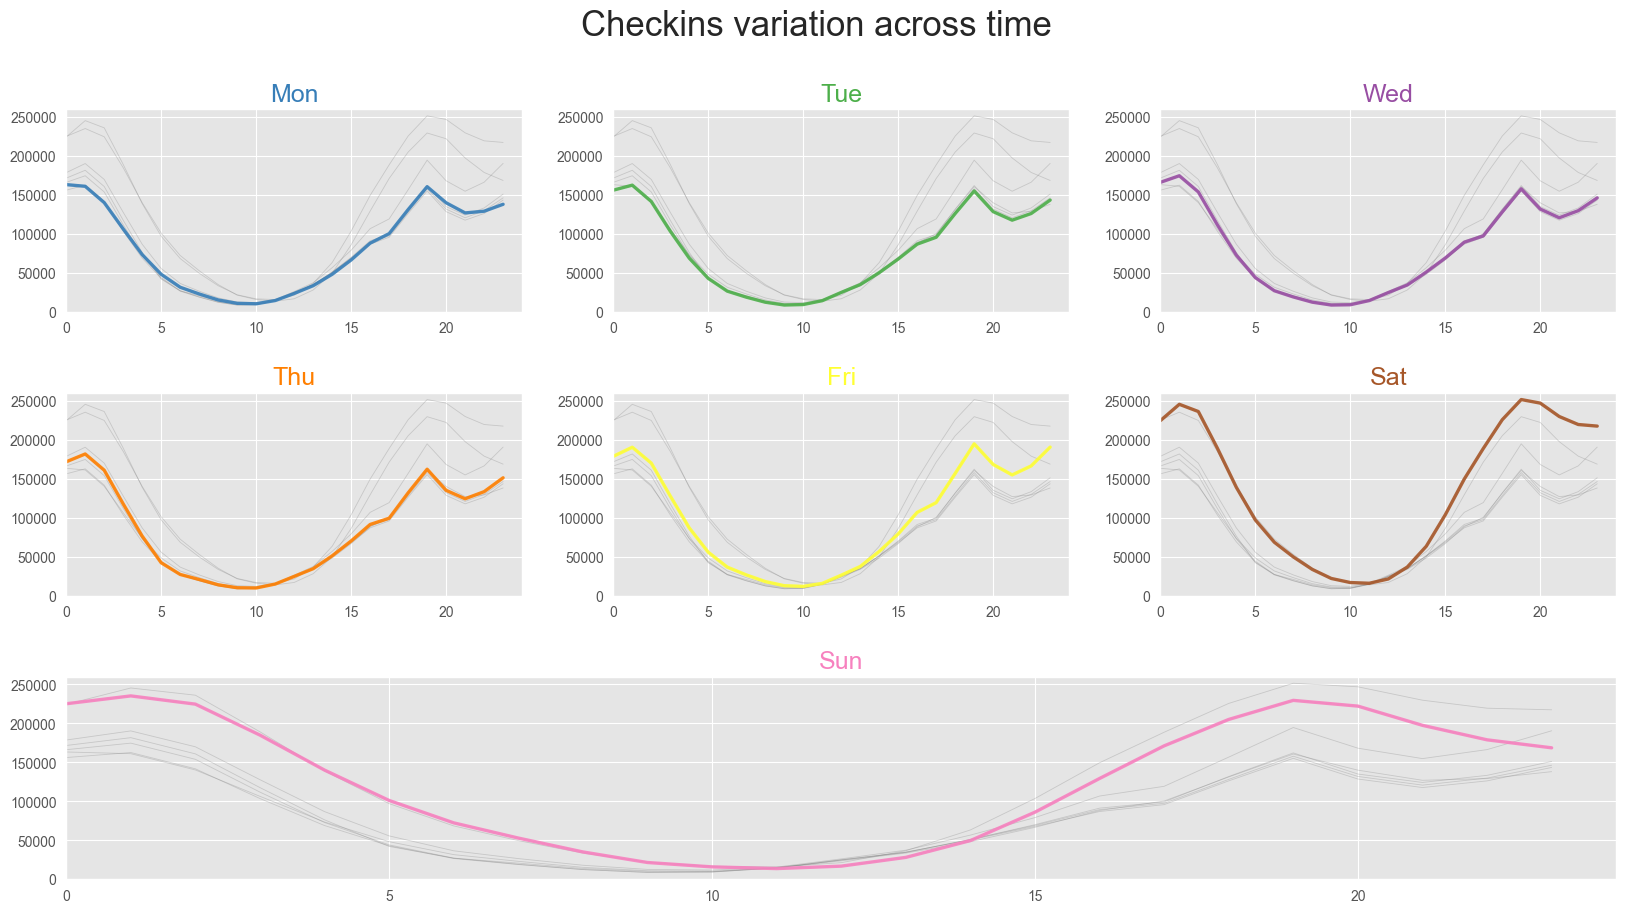

In [31]:
plt.style.use('ggplot')

# 使用'seaborn-darkgrid'样式设置绘图风格

# 创建颜色调色板
palette = plt.get_cmap('Set1')

# 创建一个大小为(20,10)的图像
plt.figure(figsize=(20,10))

# 添加总标题
plt.suptitle("Checkins variation across time", fontsize=25)

# 创建3x3的网格布局
gridspec.GridSpec(3,3)

# 调整子图之间的垂直间距
plt.subplots_adjust(hspace=0.4)

# 循环绘制多个线图
num = 0
for column in df.drop('hour', axis=1):
    num += 1
    # 找到子图的位置
    
    if num == 7:  # 调整以适应星期日的位置
        plt.subplot2grid((3,3), (2,0), colspan=3)
    else:
        plt.subplot(3,3, num)
    
    # 绘制离散的灰色线图，表示所有组的趋势
    for v in df.drop('hour', axis=1):
        plt.plot(df['hour'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
    
    # 绘制带有标签的线图，表示特定组的趋势
    plt.plot(df['hour'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
    
    # 设置x轴的范围
    plt.xlim(0,24)
    
    # 设置y轴的范围
    plt.ylim(-2,260000)
    
    # 关闭部分子图的x轴刻度
    if num in range(4) :
        plt.tick_params(labelbottom='off')
    
    # 关闭部分子图的y轴刻度
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
    
    # 添加子图标题
    plt.title(column, loc='center', fontsize=18, fontweight=0, color=palette(num))

## 用户网络

用户表包含用户及其朋友的列表。让我们试着用这个做一个网络！

### 全局图表

In [32]:
# 筛选至少有一个朋友的用户子集
subset_users = user[user['friends'] != 'None']

# 筛选至少给出 10 条评论的用户子集
subset_users = subset_users[subset_users['review_count'] >= 10]

# 拆分 "friends" 列的值，并创建新的 "list_friends" 列
subset_users['list_friends'] = subset_users["friends"].apply(lambda x: str(x).split(','))

# 仅选择 "user_id" 和 "list_friends" 两列
subset_users = subset_users[['user_id','list_friends']]

# 由于空间限制，限制 DataFrame 在前 6000 行
subset_users = subset_users.iloc[0:6000]

# 将 "user_id" 列设置为索引，并将 "list_friends" 列的值堆叠成多行
res = subset_users.set_index(['user_id'])['list_friends'].apply(pd.Series).stack()


In [33]:
network_data=res.reset_index()
network_data.tail()

user_id  level_1                        0
651588  N0ZkwirFkd_kwp05ymeYkQ      114   3MH98JxTJ4DaSy6bPkj-ng
651589  N0ZkwirFkd_kwp05ymeYkQ      115   p3ZDh00RLio8itC5a07lPg
651590  N0ZkwirFkd_kwp05ymeYkQ      116   ZAc5vMMYLgyYqgjHXGce3Q
651591  N0ZkwirFkd_kwp05ymeYkQ      117   25NDlYy0wzjq7mh3IiCp0Q
651592  N0ZkwirFkd_kwp05ymeYkQ      118   lJix8dFRFk4WvVpdRTyC0g

In [34]:
#changing the column name to suit nx import
network_data.columns=['source','level_1','target']

# Considering each (user_id,friend) pair as an edge of a graph, constructing the graph
graph=nx.from_pandas_edgelist(network_data.sample(1000))
# logging time
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 197.90769290924072 s


In [35]:
#credits https://www.kaggle.com/crailtap/basic-network-analysis-tutorial
#basic info

print(graph)

Graph with 1734 nodes and 1000 edges


In [36]:
#check density
print("The density of the graph is ",nx.density(graph))


The density of the graph is  0.000665552531728553


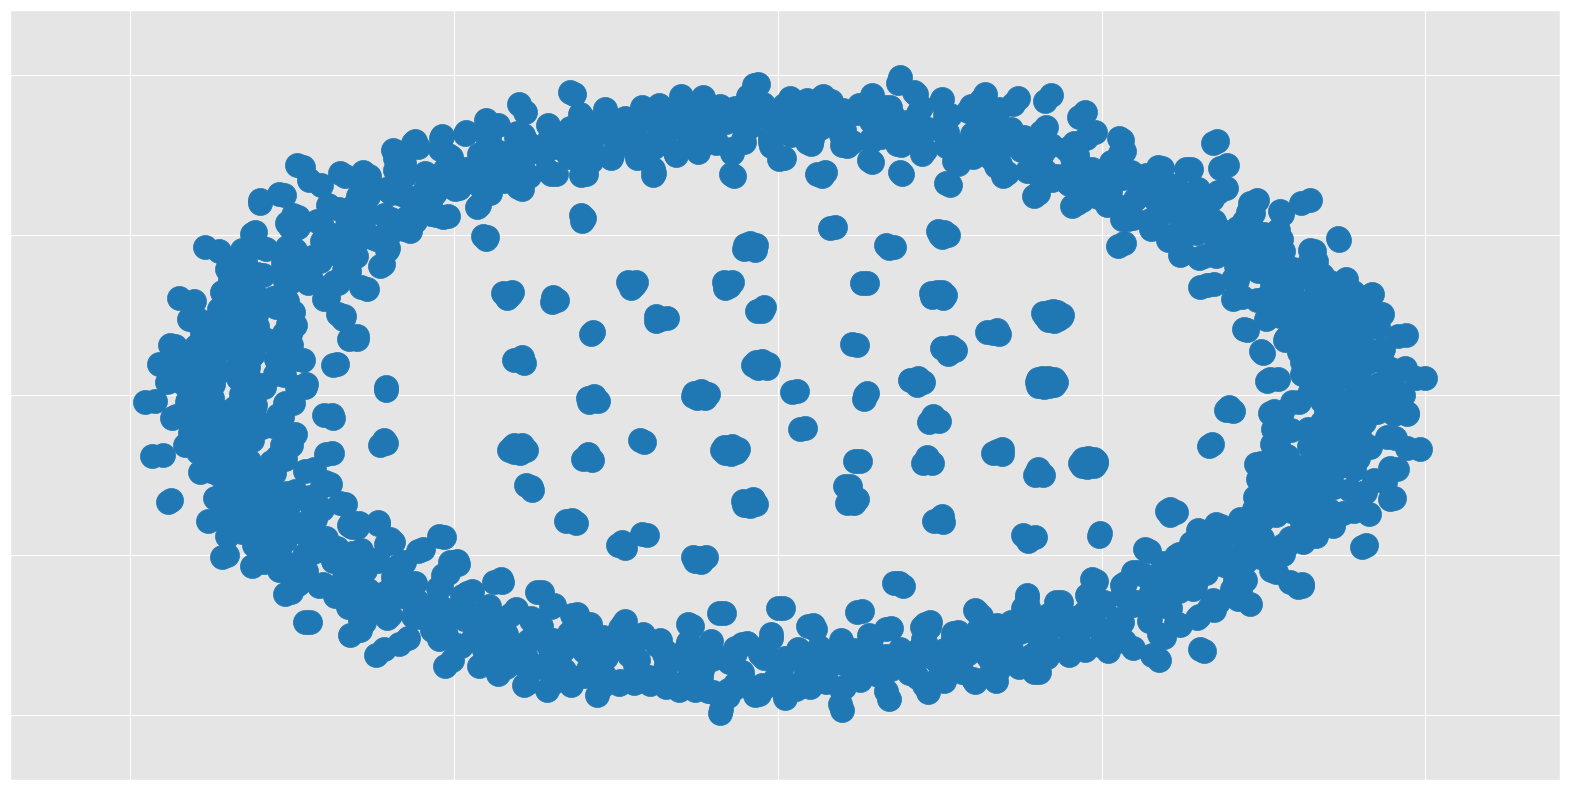

In [37]:
# we get a very sparse(not dense) graph. Maybe if we used all the nodes then we might get a more dense graph
#too big to draw!
nx.draw_networkx(graph, pos=nx.spring_layout(graph), with_labels=False)

### 图的子集 - 斯图加特地区

In [38]:
# 从位于 Stuttgart 城市的商家中提取用户数据并创建用户网络图

# 选择位于 Stuttgart 城市的商家
subset = business[business.city == 'Stuttgart']

# 将商家数据与评论数据进行内连接
subset = pd.merge(subset, reviews, how='inner', on='business_id')

# 提取唯一的用户ID
subset_users = subset.user_id.unique()

# 创建用户ID的数据框
subset_users = pd.DataFrame(subset_users, columns=['user_id'])

# 将用户ID与用户数据集进行内连接
subset_users = pd.merge(subset_users, user, how='inner', on='user_id')

# 创建好友列表
subset_users['list_friends'] = subset_users["friends"].apply(lambda x: str(x).split(','))
subset_users['count_friends'] = subset_users["list_friends"].apply(lambda x: len(x))

# 检查结果
subset_users.shape


(282, 24)

In [39]:
# 提取用户ID和好友列表
subset_users_list = subset_users[['user_id', 'list_friends']]

# 将好友列表展开成多行
network_data = subset_users_list.set_index(['user_id'])['list_friends'].apply(pd.Series).stack()
network_data = network_data.reset_index()

# 修改列名以适应网络图导入
network_data.columns = ['source', 'level_1', 'target']

In [40]:
graph=nx.from_pandas_edgelist(network_data)
# logging time
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 210.8173689842224 s


In [41]:
#basic info
print(graph)
#check density
print("The density of the graph is ",nx.density(graph))

Graph with 31979 nodes and 43839 edges
The density of the graph is  8.573821892400615e-05


In [42]:
#use degree-centrality to find out influencers in the selected region
x=nx.degree_centrality(graph)
#Creating a subset again as we cant handle 70k nodes, unfortunately.

#Using heapq to find the 500 most connected nodes (ie) peeple with the most connections
influencers=heapq.nlargest(500, x, key=x.get)

In [43]:
#creating a sub-graph as I'm not able to create the layout positions without killing the kernal
influencers_sub_graph=graph.subgraph(influencers)

# Check for isolates ( nodes with no edges (ie) users without friends in the sub-graph)
# graph=graph.remove_nodes_from(nx.isolates(graph))
list_of_nodes_to_be_removed=[x for x in nx.isolates(influencers_sub_graph)]

# remove the selected isolates from the main graph
graph.remove_nodes_from(list_of_nodes_to_be_removed)

In [44]:
#recreate the subgraph from the updated graph
influencers_sub_graph=graph.subgraph(influencers)

Graph with 486 nodes and 3678 edges
The density of the graph is  0.031207840142548047


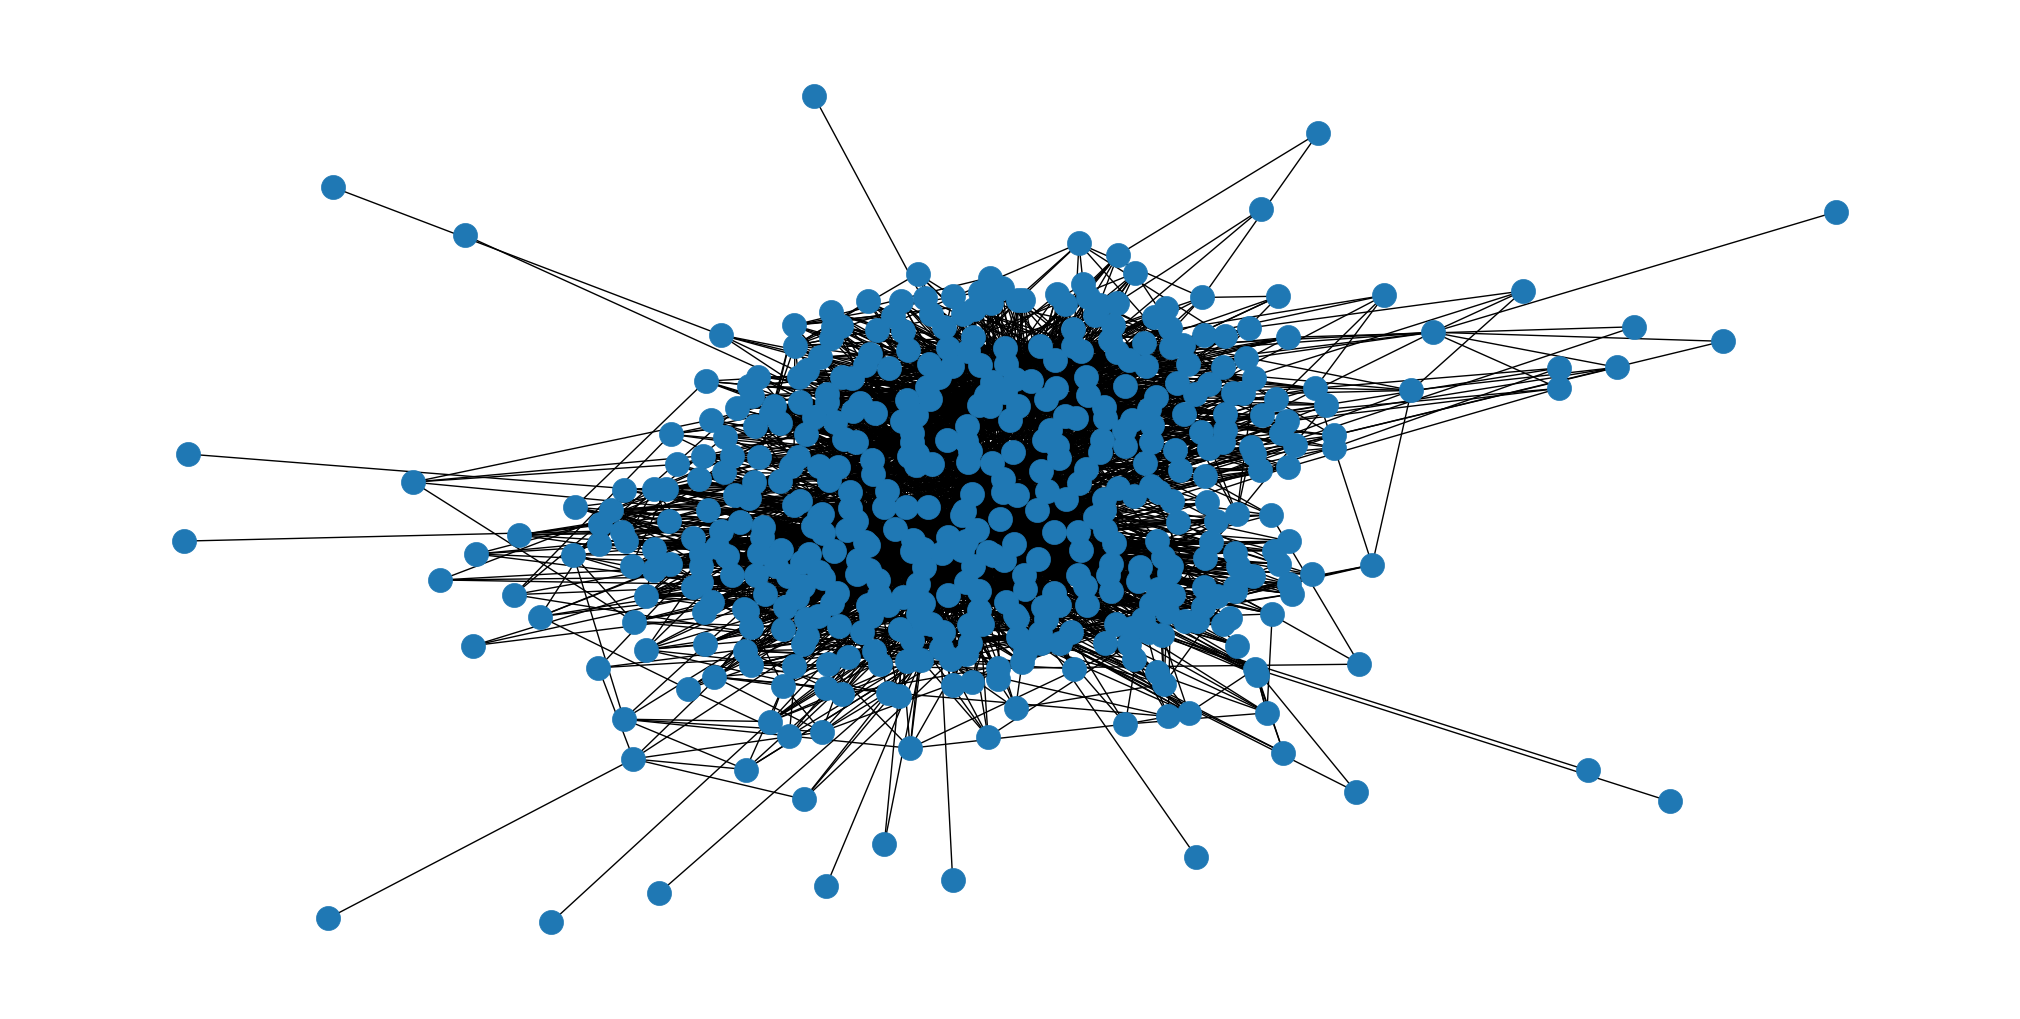

In [45]:
#basic info
print(influencers_sub_graph)
#check density
print("The density of the graph is ",nx.density(influencers_sub_graph))

nx.draw(influencers_sub_graph, pos=nx.spring_layout(influencers_sub_graph))

## 网络可视化

### Spring layout

In [46]:
# create the layout
pos = nx.spring_layout(influencers_sub_graph)

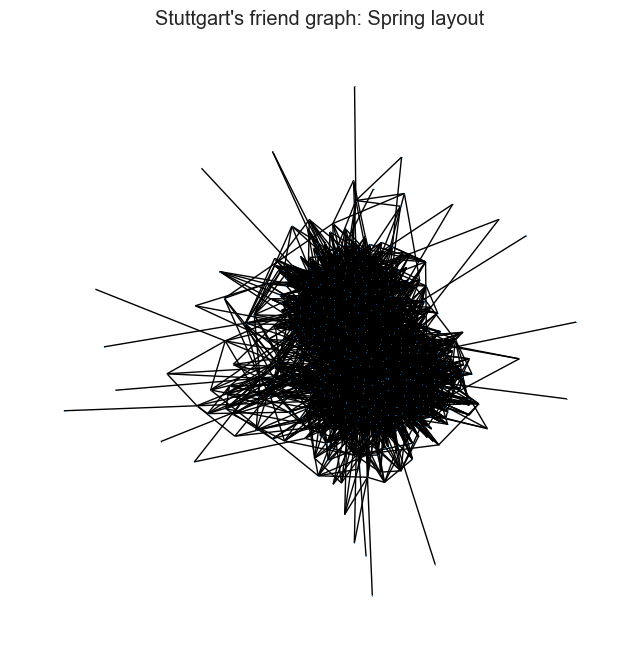

In [47]:
plt.figure(figsize=(8,8))
plt.title("Stuttgart's friend graph: Spring layout")
nx.draw(influencers_sub_graph, pos=pos, node_size=0.05, width=1)

上面的图表结构显示了斯图加特的用户群及其联系。

让我们探索 networkx 可能的其他视图


### Circular/Circos布局

Spring布局
Circular/Circos布局
随机布局
Kamada-Kawai布局


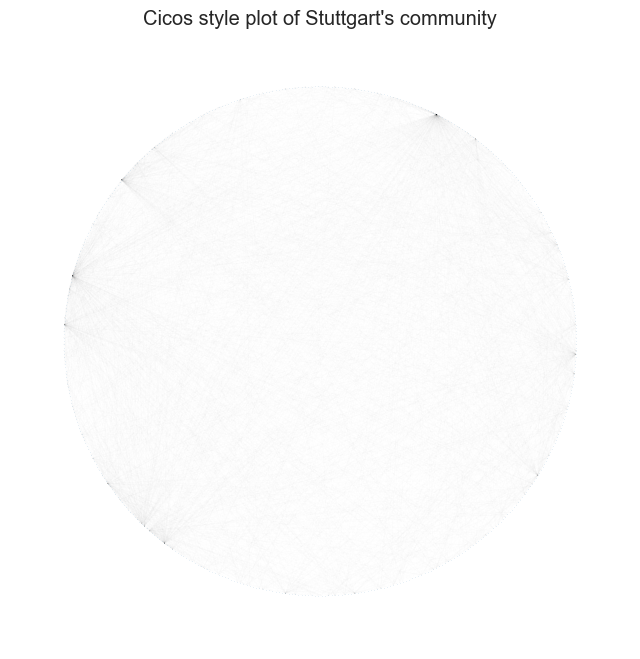

In [48]:
plt.figure(figsize=(8,8))
plt.title("Cicos style plot of Stuttgart's community")
#https://stackoverflow.com/questions/21978487/improving-python-networkx-graph-layout
nx.draw_circular(influencers_sub_graph,node_size=0.001, width=0.001)

### 随机布局

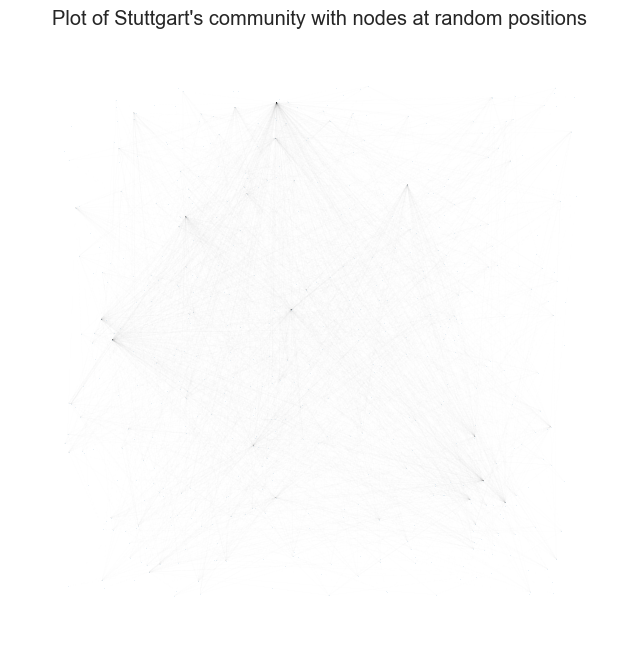

In [49]:
plt.figure(figsize=(8,8))
plt.title("Plot of Stuttgart's community with nodes at random positions")
#https://stackoverflow.com/questions/21978487/improving-python-networkx-graph-layout
nx.draw_random(influencers_sub_graph,node_size=0.001, width=0.001)

### Kamada-Kawai布局

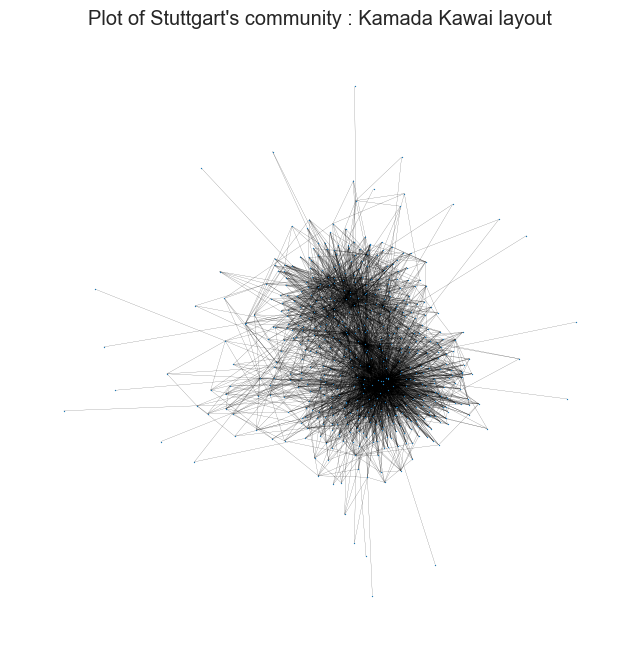

In [50]:
plt.figure(figsize=(8,8))
plt.title("Plot of Stuttgart's community : Kamada Kawai layout")
pos2=nx.kamada_kawai_layout(influencers_sub_graph)
nx.draw(influencers_sub_graph, pos=pos, node_size=0.2, width=0.1)

## 社区检测

找出斯图加特有影响力的潜在社区，将检测到的社区覆盖在图表的 spring 布局上

In [51]:
# pip install python-louvain

In [52]:
#community detection -- Done in 3 lines :p
from community import community_louvain
parts = community_louvain.best_partition(influencers_sub_graph)
values = [parts.get(node) for node in influencers_sub_graph.nodes()]

print(len(set(values))," Communities have been identified")

4  Communities have been identified


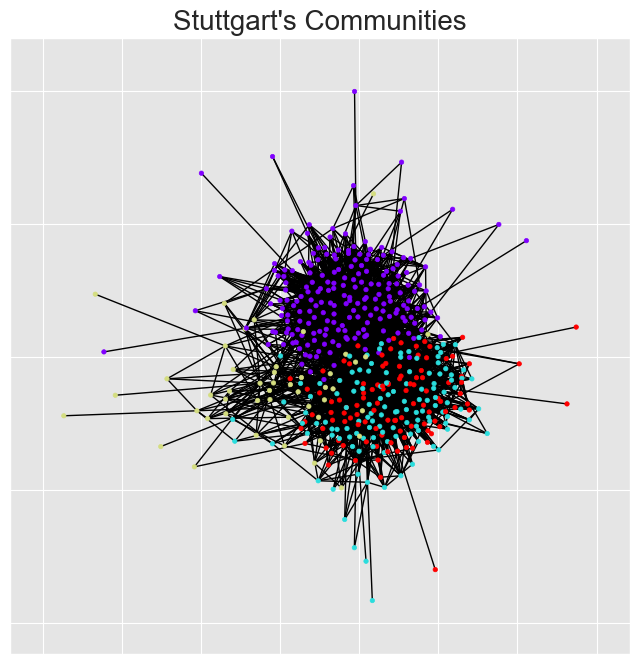

In [53]:
plt.figure(figsize=(8,8))
plt.axes=False
plt.title("Stuttgart's Communities",fontsize=20)
nx.draw_networkx(influencers_sub_graph, 
                 pos = pos,cmap = plt.get_cmap("rainbow"), 
                 node_color = values, 
                 node_size = 10,
                 with_labels = False)

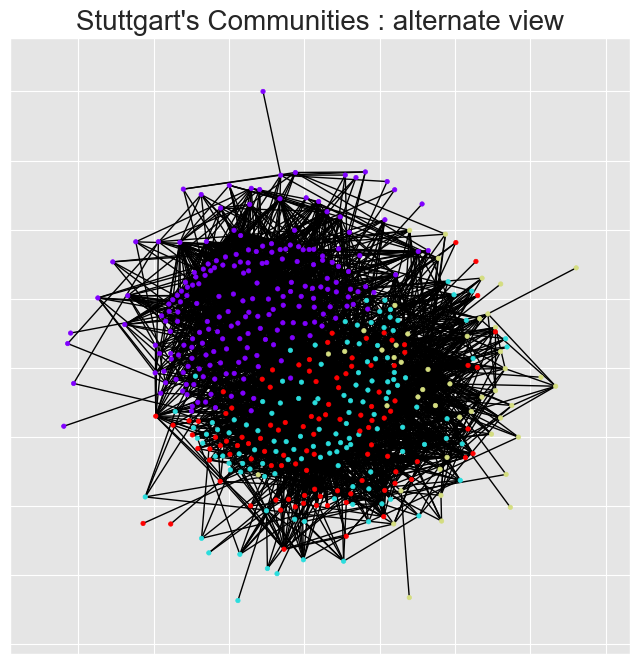

In [54]:
plt.figure(figsize=(8,8))
plt.axes=False
plt.title("Stuttgart's Communities : alternate view",fontsize=20)
nx.draw_networkx(influencers_sub_graph, pos = pos2,cmap = plt.get_cmap("rainbow"), node_color = values, node_size = 10, with_labels = False)